# 18. 문자를 읽을 수 있는 딥러닝  
## 18-1. 들어가며
OCR(Optical Character Recognition, 광학 문자 인식).  
딥러닝 도입 이후 획기적으로 개선되어 여러 산업 도메인에서 유용하게 사용될 것이라 생각한다.  
ex) 자동차 번호판 인식, 명함 인식  
### 실습목표  
------------------------------------------------------------------------------------------------------------
  1. OCR의 과정을 이해합니다.
  2. 문자인식 결과의 표현방식을 이해합니다
  3. 파이썬을 통해 OCR을 사용할 수 있습니다.  
### 학습 내용
------------------------------------------------------------------------------------------------------------
  * 기계가 읽을 수 있나요?
  * 어떤 과정으로 읽을까요?
  * 딥러닝 문자인식의 시작
  * 사진 속 문자 찾아내기 - detection
  * 사진 속 문자 읽어내기 - recognition
  * keras-ocr 써보기
  * 태서랙트 써보기
  * 프로젝트: 다양한 OCR 모델 비교하기
### 준비물
-----------------------------------------------------------------------------------------------------------
개인 실습환경에 따라 경로, 디렉토리 지정  
```
$ mkdir -p ~/aiffel/ocr_python
```


## 18-2. 기계가 읽을 수 있나요?  
사람이 문자를 읽는 과정은 문자를 인식하고 인식한 문자를 해독하는 게 일반적.  
기계도 동일한 과정을 거치기에 문자 존재 detection, 어떤 문자인지 판독 recognition.
[구글 OCR](https://cloud.google.com/vision/?utm_source=google&utm_medium=cpc&utm_campaign=japac-KR-all-en-dr-bkws-all-all-trial-e-dr-1008074&utm_content=text-ad-none-none-DEV_c-CRE_252596144846-ADGP_Hybrid+%7C+AW+SEM+%7C+BKWS+~+T1+%7C+EXA+%7C+ML+%7C+M:1+%7C+KR+%7C+en+%7C+Vision+%7C+API-KWID_43700029837773855-kwd-316837066534&userloc_1009877&utm_term=KW_google%20vision%20api%20ocr&gclid=Cj0KCQiAyp7yBRCwARIsABfQsnRMFOzgV84oX2MTWrPMvaE_JgjgTshUaLE6LYrsk8lM23-43gBfCkMaAnGaEALw_wcB)  
우리가 쓸 구글 OCR을 한번 체험해봅시다.  
1. 구글의 파이썬 API 인터페이스 모듈을 설치
```
$ pip install --upgrade google-api-python-client
$ pip install google-cloud-vision
```
2. 구글 cloud vision api사용.
[google cloud vision api사용하는법](http://egloos.zum.com/mcchae/v/11342622)
```
$ cp ~/Downloads/sheet-contents-xxxx.json ~/aiffel/ocr_python/my_google_api_key.json
```  
3. 인증키 경로 등록 후 커널 재기동  
터미널에 인증키 경로 변수 등록후 커널종료 후 재기동
```
$ export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json
```
구글 API 계속 사용시에는 아래같이 설정  
```
$ echo "export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json" >> ~/.bashrc
```  
4. API 사용 테스트

In [23]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

-rw-rw-r-- 1 ssac19 ssac19 2343  3월 17 22:24 /home/ssac19/aiffel/ocr_python/my_google_api_key.json
Texts:

"늘 같은 자리에 있을 거라 생각하며 손을 뻗었는데 그 무엇
도 잡히지 않는다. 그제야 고개를 돌려서 봤을 땐 아무것도 없
다. 우리도 없고, 당신도 없다. 그저 나만 있을 뿐이다. 공허함
이란 이런 걸까. 내가 당신에게 사랑한다는 말을 할 수 있었던
그 밤. 당신의 손을 잡고, 품에 안기고, 당신의 목소리를 들을
수 있던 그 밤. 문득 당신을 닮은 것들이 스쳐서 너무 그리운 밤
이다.
"

"늘"

"같은"

"자리"

"에"

"있을"

"거라"

"생각"

"하며"

"손"

"을"

"뻗었"

"는데"

"그"

"무엇"

"도"

"잡히지"

"않는다"

"."

"그제야"

"고개"

"를"

"돌려서"

"봤을"

"땐"

"아무것도"

"없"

"다"

"."

"우리도"

"없고"

","

"당신"

"도"

"없다"

"."

"그저"

"나만"

"있을"

"뿐이다"

"."

"공허함"

"이란"

"이런"

"걸까"

"."

"내가"

"당신"

"에게"

"사랑한다"

"는"

"말"

"을"

"할"

"수"

"있었던"

"그"

"밤"

"."

"당신"

"의"

"손"

"을"

"잡고"

","

"품"

"에"

"안기고"

","

"당신"

"의"

"목소리"

"를"

"들을"

"수"

"있던"

"그"

"밤"

"."

"문득"

"당신"

"을"

"닮은"

"것들이"

"스쳐"

"서"

"너무"

"그리운"

"밤"

"이다"

"."
bounds: (98,510),(108,510),(107,545),(97,545)
Texts:

"오후 네시에 온다연
나는 세시부터 행복해질 거야
네가
"

"오후"

"네시"

"에"

"온다"

"연"

"나는"

"세시"

"부터"

"행복"

"해질"

"거야"

"네가"
bo

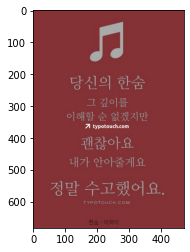

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
for i in range(5):
    path = os.getenv('HOME')+'/aiffel/ocr_python/test_image'+str(i)+'.png'   

    img = mpimg.imread(path)
    plt.imshow(img)

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
    detect_text(path)

## 18-3. 어떤 과정으로 읽을까요?  
구글 API에서는 문자영역을 사각형으로 표현하고 Block, Paragraph로 구분해서 인식결과를 나타냄.  
입력한 사진속에서 문자의 위치를 찾아냄(text detection/문자검출)  
찾은 문자영역에서 문자를 읽어냄(text recognition/문자인식)  
문자영역 표현 방법으로 사각형의 네 꼭짓점 좌표를 넘겨주는 방식이 있으며 다른 방식도 있다.  
다각형인 polygon, 픽셀수준으로 영역표현한 mask.

## 18-4. 딥러닝 문자인식의 시작  
우리가 딥러닝을 처음 시작하며 본 MNIST 손글씨 셋을 바탕으로 만든 LeNet은 우편번호나 손글씨를 읽기 위해 만들어졌다.
<img src="LeNet.png">  
구조를 보면 Conv layer와 최종 출력 레이어로 이루어져 있다.  
<img src="LeNet_ex.gif">  
[demo](http://yann.lecun.com/exdb/lenet/stroke-width.html)  
[유튜브](https://www.youtube.com/watch?v=m3BrTjo2zUA)  
하지만 이런 단순한 분류 모델로는 우리가 원하는 수준의 결과를 얻을 수 없다.  
강건한 모델을 얻는 법.  
Ans) 노이즈가 많은 케이스에 대한 데이터를 확보하거나 Augmentation을 통해서 해당 케이스에 대한 강건성을 확보합니다.

## 18-5. 사진 속 문자 찾아내기 - detection  
최근 딥러닝 모델은 일반적인 object detection으로 접근.  
object detection모델에게 문자를 찾도록 변경하고 학습시킴.  
검출방식에는 regression, segmentation이 있다.  
regression은 기준으로 하는 박스대비 문자의 박스가 얼마나 차이나는지 학습.  
segmentation은 픽셀단위로 해당 픽셀이 문자를 표현하는지 분류하는 문제.  
문자의 특징은 촘촘히 배치되어 있으며, 영역과 배치가 자유로워서 따로 설정이 필요. 
문자, 단어, 줄, 단락 단위로 검출 가능!

## 18-6. 사진 속 문자 읽어내기 - recognition  
문자 인식은 사진에서 문자검출하는 모델이 영역을 잘라서 주면 해당 영역에 어떤 글자가 포함되어있는지 읽어낸다.  
아래 사진은 ICDAR15라는 OCR데이터셋에서 단어 단위로 잘린 이미지.
<img src="ICDAR15.png">  
위 과정은 사실 자연어처리에서 영감을 많이 받았다.  
이미지내의 문자인식모델의 기본적인 방식은 CNN+RNN인 CRNN모델로 이미지내의 텍스트와 관련된 특징을 CNN으로 추출후 스텝 단위의 문자정보를 RNN으로 인식.  
detection, recognition모델만으로 문단, 블록 정보를 알 수 없을 것 같은데 어떤 로직을 적용하면 좋을까?
Ans) 이미지 내에서 검출된 단어 영역의 위치정보를 기준으로 분리해낼 수 있을 것 같습니다.
X,Y 축으로 L2 Distance가 일정 이내인 단어 또는 문자들의 그룹을 만들어 단락으로 만들어낼 수 있습니다.  
참고할 OCR 영상들
[네이버 CRAFT](https://tv.naver.com/v/4578167)  
[유튜브](https://www.youtube.com/watch?v=ckRFBl_XWFg)

## 18-7. keras-ocr 써보기.  
이번에는 텐서플로우 기반으로 모델을 구현해서 OCR을 돌려보자.  
keras-ocr은 keras api를 기반으로 End-to-End OCR을 할 수 있게 한다.  
검출모델로는 아까 본 CRAFT모델 사용, 인식모델로는 CRNN사용.  
tensorflow 2.2.0에서만 keras-ocr이 구동.  
텐서플로우 버전 확인  
```
import tensorflow as tf
print(tf.__version__)
$ pip list | grep tensorflow
# 만약 tensorflow 버전이 맞지 않다면 재설치를 해줍시다. 
$ pip uninstall tensorflow
$ pip install tensorflow==2.2.0
```
keras-ocr설치  
```
$ pip install keras-ocr
```  
평소 gpu 사용에 에러가 있다면 아래 명령어 사용  
```
$ echo "export TF_FORCE_GPU_ALLOW_GROWTH=true" >> ~/.bashrc
```  
확인을 위해 아래 코드 터미널에서 실행. true가 나오지 않으면 OOM에러가 날 수 있다.
```
$ echo $TF_FORCE_GPU_ALLOW_GROWTH
```

In [3]:
!export TF_FORCE_GPU_ALLOW_GROWTH=true

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
import matplotlib.pyplot as plt#인식결과 시각화
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()#미리 학습된 모델의 가중치 불러온다. 검출기, 인식기용 각각 한개씩

Looking for /home/ssac19/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ssac19/.keras-ocr/crnn_kurapan.h5


In [6]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# recognize()에 이미지를 넣어주자.
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


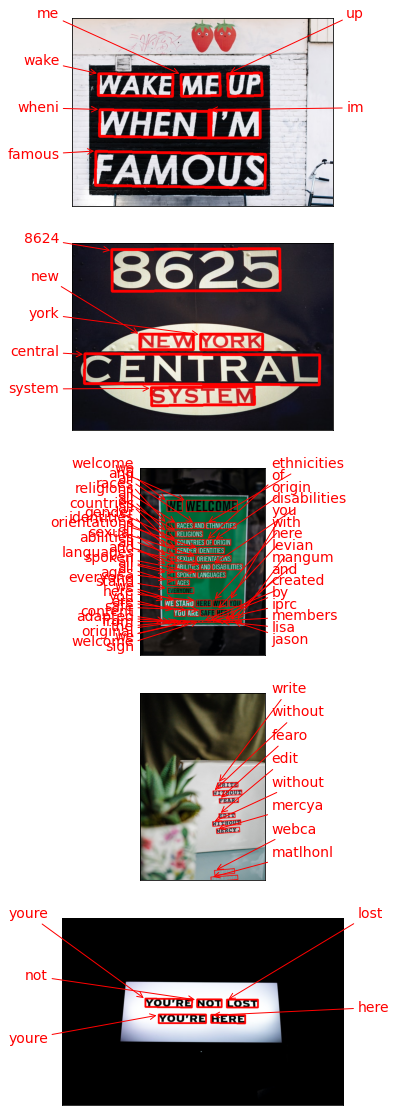

In [7]:
#인식된 결과를 시각화 해보자.
# recognize()는 검출기와 인식기를 두고 검축리고 바운딩박스 검출후 인식기가 각 박스에서 문자 인식
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

keras-ocr은 한글 데이터셋으로 훈련되어 있지 않기에 detection은 되도 recognition이 이상할 수 있다.

## 18-8. 테서렉트 써보기  
이번에는 테서렉트 라이브러리로 이미지에서 문자인식.  
구글이 후원하는 OCR 오픈소스 라이브러리로 한국어가 지원된다.

### 1. 테서렉트 설치하기
---------------------------------------------------------------
터미널에 아래코드 실행
```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```  
### 2. 테서렉트 파이썬 wrapper 설치하기
---------------------------------------------------------------
Pytesseract는 os에 설치한 테서렉트를 파이썬에서 쉽게 사용할수 있게 해주는 래퍼 라이브러리. 파이썬에서도 테서렉트 엔진 기능 사용가능.
```
$ pip install pytesseract
```  
### 3. 테서랙트로 문자검출하고 이미지 자르기(detection)
---------------------------------------------------------------
한번에 이미지 내의 문자검출과 인식이 가능하지만, 과정을 보기 위해 검출부터 해보자

In [8]:
# import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/ssac19/aiffel/ocr_python/0000.png
/home/ssac19/aiffel/ocr_python/0001.png
/home/ssac19/aiffel/ocr_python/0002.png
/home/ssac19/aiffel/ocr_python/0003.png
/home/ssac19/aiffel/ocr_python/0004.png
/home/ssac19/aiffel/ocr_python/0005.png
/home/ssac19/aiffel/ocr_python/0006.png
/home/ssac19/aiffel/ocr_python/0007.png
/home/ssac19/aiffel/ocr_python/0008.png
/home/ssac19/aiffel/ocr_python/0009.png
/home/ssac19/aiffel/ocr_python/0010.png
/home/ssac19/aiffel/ocr_python/0011.png
/home/ssac19/aiffel/ocr_python/0012.png
/home/ssac19/aiffel/ocr_python/0013.png
/home/ssac19/aiffel/ocr_python/0014.png
/home/ssac19/aiffel/ocr_python/0015.png
/home/ssac19/aiffel/ocr_python/0016.png
/home/ssac19/aiffel/ocr_python/0017.png
/home/ssac19/aiffel/ocr_python/0018.png
/home/ssac19/aiffel/ocr_python/0019.png
/home/ssac19/aiffel/ocr_python/0020.png
/home/ssac19/aiffel/ocr_python/0021.png
/home/ssac19/aiffel/ocr_python/0022.png
/home/ssac19/aiffel/ocr_python/0023.png
/home/ssac19/aiffel/ocr_python/0024.png


위에서 구현한 crop_word_regions()는 선택한 테스트 이미지를 받아서, 문자 검출 후 검출된 문자영역을 crop한 이미지로 만들어 그 파일들의 list return.  
기본적으로 pytesseract.image_to_data()를 사용한다.
pytesseract의 Output을 사용해 결과값의 형식을 dict로 설정.  
결과에 바운딩박스의 left, top, width, height정보가 들어있다.  
바운딩 박스를 통해 PIL(pillow), opencv라이브러리를 사용해 crop하여 cropped_image_path에 담아 리턴.  
테러렉트 한국어패키지다운로드  
```
$ sudo apt install tesseract-ocr-kor
```
### 4.테서렉트로 잘린 이미지에서 단어인식하기
----------------------------------------------------------------
바운딩박스에 따라 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나오는 image_to_string()사용.  

In [10]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

글

같은

자리에

있음

거라

생각하며

을

뻔었는데

0

무엇

누

잡히지

않는다.

그제아

고개를

돌려서

봤으.

때

아무것도

0

다.

우리도

여고

당신도

어다

. 그저

나만

있을

뿐이다.

공허함

란 이런

걸까

내가

당신에게

사랑

한다는

말음

함

1

있었던

가 헤드

당신의

을

잡고,

품에

안기

시

당신의

목소리를

들을

수 있던

"7.

수 득

당신을

닮은

것들이

스쳐서

너무

그리운

밤

이다

Done


## 18-9. 프로젝트: 다양한 OCR 모델 비교하기
위에 다뤄본 3가지를 검증해보는 프로젝트를 해보자.

### Step1. 검증용 데이터셋 준비
----------------------------------------------------------------
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
---------------------------------------------------------------
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

#### Google OCR API

-rw-rw-r-- 1 ssac19 ssac19 2343  3월 17 22:24 /home/ssac19/aiffel/ocr_python/my_google_api_key.json
Texts:

"늘 같은 자리에 있을 거라 생각하며 손을 뻗었는데 그 무엇
도 잡히지 않는다. 그제야 고개를 돌려서 봤을 땐 아무것도 없
다. 우리도 없고, 당신도 없다. 그저 나만 있을 뿐이다. 공허함
이란 이런 걸까. 내가 당신에게 사랑한다는 말을 할 수 있었던
그 밤. 당신의 손을 잡고, 품에 안기고, 당신의 목소리를 들을
수 있던 그 밤. 문득 당신을 닮은 것들이 스쳐서 너무 그리운 밤
이다.
"

"늘"

"같은"

"자리"

"에"

"있을"

"거라"

"생각"

"하며"

"손"

"을"

"뻗었"

"는데"

"그"

"무엇"

"도"

"잡히지"

"않는다"

"."

"그제야"

"고개"

"를"

"돌려서"

"봤을"

"땐"

"아무것도"

"없"

"다"

"."

"우리도"

"없고"

","

"당신"

"도"

"없다"

"."

"그저"

"나만"

"있을"

"뿐이다"

"."

"공허함"

"이란"

"이런"

"걸까"

"."

"내가"

"당신"

"에게"

"사랑한다"

"는"

"말"

"을"

"할"

"수"

"있었던"

"그"

"밤"

"."

"당신"

"의"

"손"

"을"

"잡고"

","

"품"

"에"

"안기고"

","

"당신"

"의"

"목소리"

"를"

"들을"

"수"

"있던"

"그"

"밤"

"."

"문득"

"당신"

"을"

"닮은"

"것들이"

"스쳐"

"서"

"너무"

"그리운"

"밤"

"이다"

"."
bounds: (98,510),(108,510),(107,545),(97,545)
Texts:

"오후 네시에 온다연
나는 세시부터 행복해질 거야
네가
"

"오후"

"네시"

"에"

"온다"

"연"

"나는"

"세시"

"부터"

"행복"

"해질"

"거야"

"네가"
bo

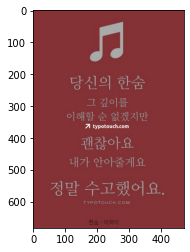

In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
for i in range(5):
    path = os.getenv('HOME')+'/aiffel/ocr_python/test_image'+str(i)+'.png'   

    img = mpimg.imread(path)
    plt.imshow(img)

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
    detect_text(path)

#### keras-OCR

In [2]:
!export TF_FORCE_GPU_ALLOW_GROWTH=true

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Looking for /home/ssac19/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ssac19/.keras-ocr/crnn_kurapan.h5


/home/ssac19/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


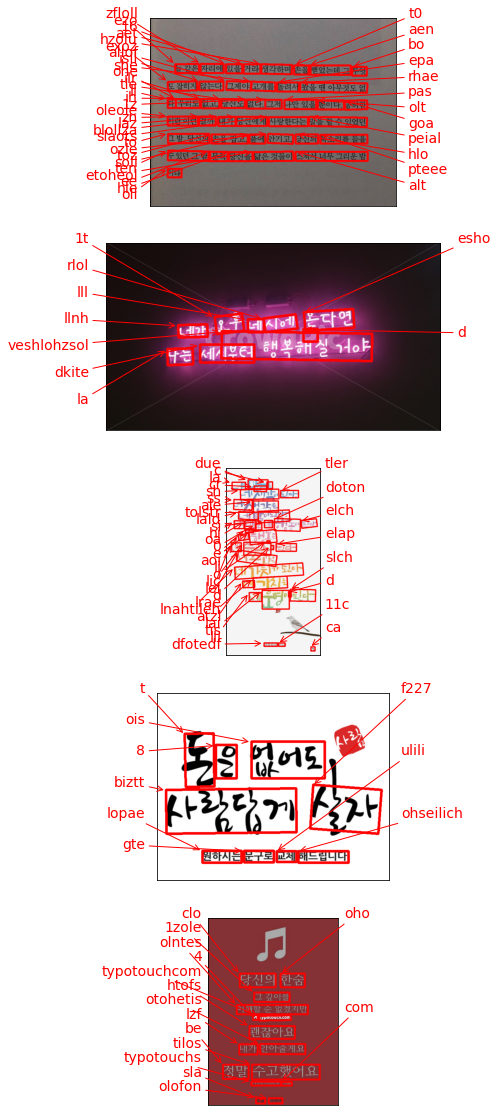

In [3]:
import matplotlib.pyplot as plt#인식결과 시각화
import keras_ocr
import os

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()#미리 학습된 모델의 가중치 불러온다. 검출기, 인식기용 각각 한개씩

# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# recognize()에 이미지를 넣어주자.
path=[]
for i in range(5):
    path.append(os.getenv('HOME')+'/aiffel/ocr_python/test_image'+str(i)+'.png')
image_urls = [path[0], path[1], path[2], path[3], path[4]]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

#인식된 결과를 시각화 해보자.
# recognize()는 검출기와 인식기를 두고 검축리고 바운딩박스 검출후 인식기가 각 박스에서 문자 인식
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### Pytesseract

In [6]:
# import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

for i in range(5):
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'+str(i)
    img_file_path = work_dir + '/test_image'+str(i)+'.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/ssac19/aiffel/ocr_python/test0/0000.png
/home/ssac19/aiffel/ocr_python/test0/0001.png
/home/ssac19/aiffel/ocr_python/test0/0002.png
/home/ssac19/aiffel/ocr_python/test0/0003.png
/home/ssac19/aiffel/ocr_python/test0/0004.png
/home/ssac19/aiffel/ocr_python/test0/0005.png
/home/ssac19/aiffel/ocr_python/test0/0006.png
/home/ssac19/aiffel/ocr_python/test0/0007.png
/home/ssac19/aiffel/ocr_python/test0/0008.png
/home/ssac19/aiffel/ocr_python/test0/0009.png
/home/ssac19/aiffel/ocr_python/test0/0010.png
/home/ssac19/aiffel/ocr_python/test0/0011.png
/home/ssac19/aiffel/ocr_python/test0/0012.png
/home/ssac19/aiffel/ocr_python/test0/0013.png
/home/ssac19/aiffel/ocr_python/test0/0014.png
/home/ssac19/aiffel/ocr_python/test0/0015.png
/home/ssac19/aiffel/ocr_python/test0/0016.png
/home/ssac19/aiffel/ocr_python/test0/0017.png
/home/ssac19/aiffel/ocr_python/test0/0018.png
/home/ssac19/aiffel/ocr_python/test0/0019.png
/home/ssac19/aiffel/ocr_python/test0/0020.png
/home/ssac19/aiffel/ocr_python/tes

### Step3. 테스트 결과 정리
----------------------------------------------------
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

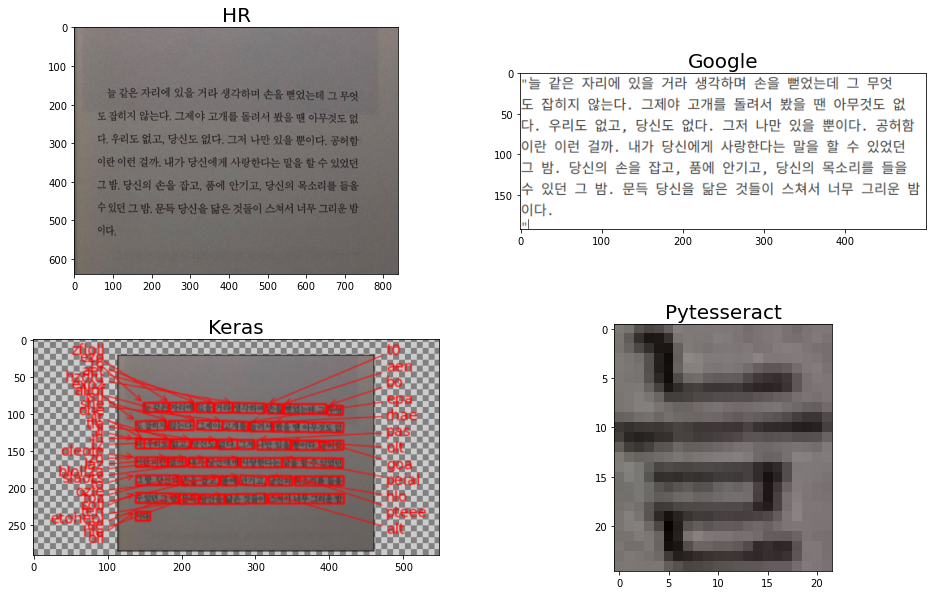

In [14]:
path=[]
hr=[None] * 5
Google=[None] * 5
Keras=[None] * 5
tess=[None] * 5

for i in range(5):
    path.append(os.getenv('HOME')+'/aiffel/ocr_python/test'+str(i))
    hr[i]=mpimg.imread(path[i]+'/test_image'+str(i)+'.png')
    Google[i]=mpimg.imread(path[i]+'/G'+str(i+1)+'.png')
    Keras[i]=mpimg.imread(path[i]+'/keras'+str(i+1)+'.png')
    tess[i]=mpimg.imread(path[i]+'/0000.png')
titles = ["HR", "Google", "Keras", "Pytesseract"]

plt.figure(figsize=(16,10))

for j in range(4):
    plt.subplot(2,2,j+1)
    if j == 0:
        plt.imshow(hr[0])
    if j == 1:
        plt.imshow(Google[0])
    if j == 2:
        plt.imshow(Keras[0])
    if j == 3:
        plt.imshow(tess[0])
    plt.title(titles[j], fontsize=20)

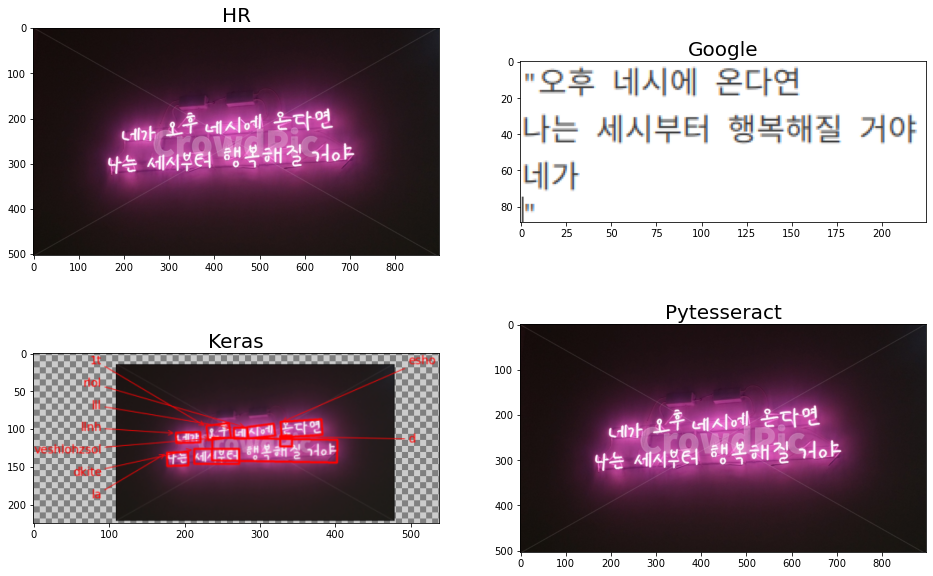

In [19]:
plt.figure(figsize=(16,10))
for j in range(4):
    plt.subplot(2,2,j+1)
    if j == 0:
        plt.imshow(hr[1])
    if j == 1:
        plt.imshow(Google[1])
    if j == 2:
        plt.imshow(Keras[1])
    if j == 3:
        plt.imshow(tess[1])
    plt.title(titles[j], fontsize=20)

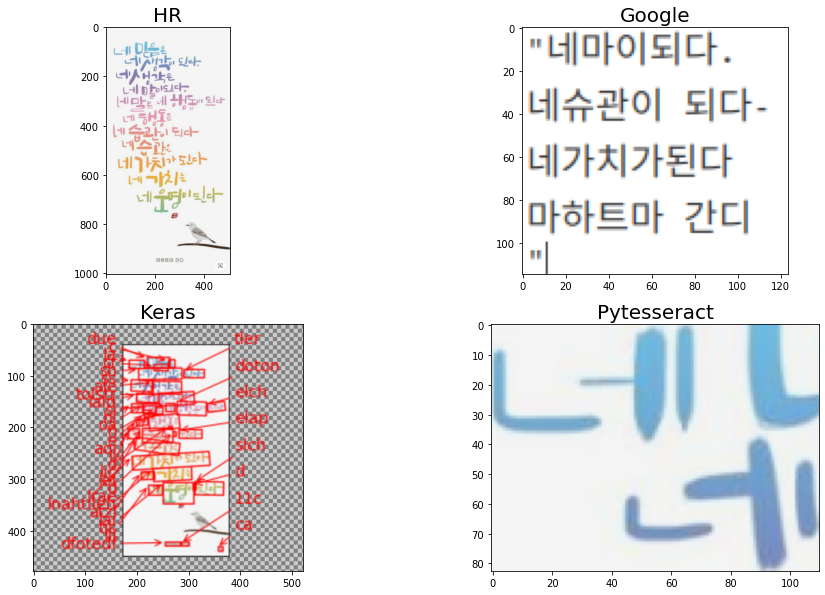

In [20]:
plt.figure(figsize=(16,10))
for j in range(4):
    plt.subplot(2,2,j+1)
    if j == 0:
        plt.imshow(hr[2])
    if j == 1:
        plt.imshow(Google[2])
    if j == 2:
        plt.imshow(Keras[2])
    if j == 3:
        plt.imshow(tess[2])
    plt.title(titles[j], fontsize=20)

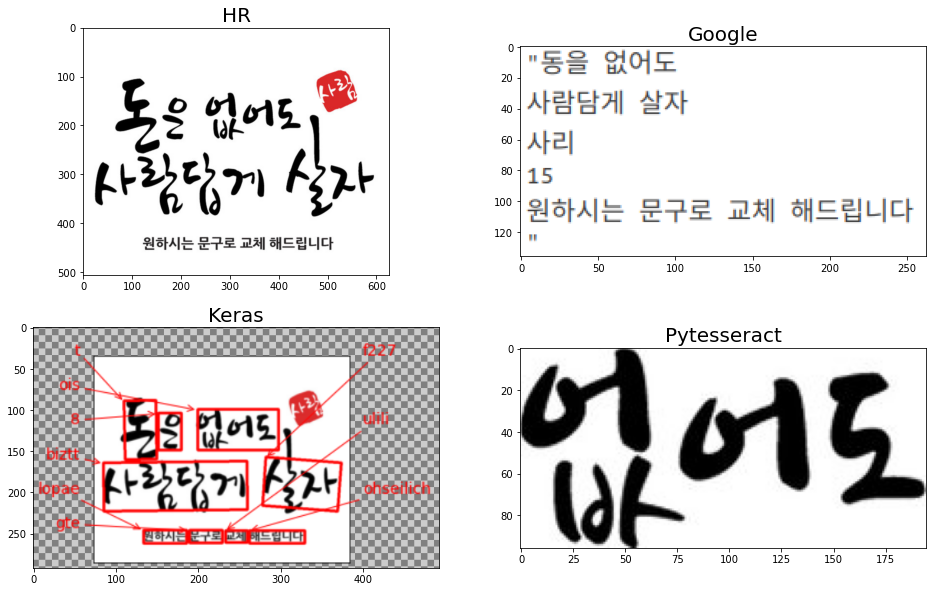

In [21]:
plt.figure(figsize=(16,10))
for j in range(4):
    plt.subplot(2,2,j+1)
    if j == 0:
        plt.imshow(hr[3])
    if j == 1:
        plt.imshow(Google[3])
    if j == 2:
        plt.imshow(Keras[3])
    if j == 3:
        plt.imshow(tess[3])
    plt.title(titles[j], fontsize=20)

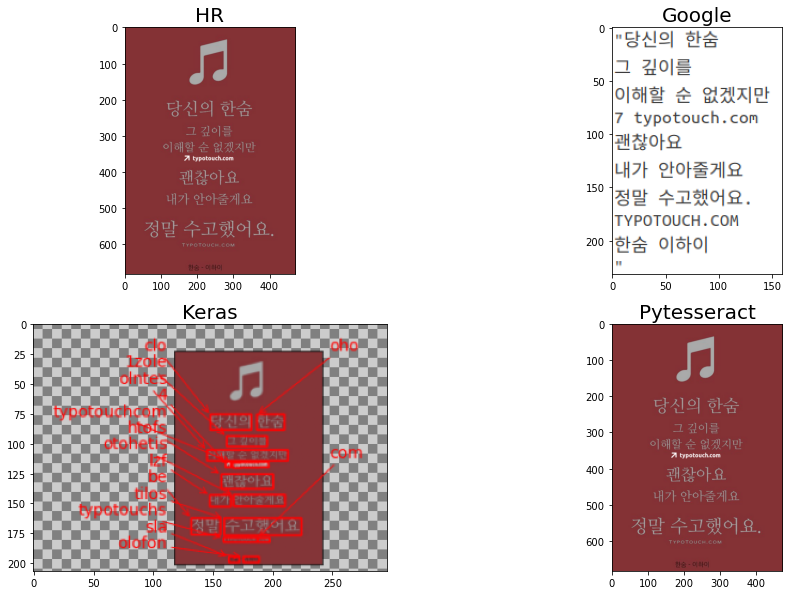

In [22]:
plt.figure(figsize=(16,10))
for j in range(4):
    plt.subplot(2,2,j+1)
    if j == 0:
        plt.imshow(hr[4])
    if j == 1:
        plt.imshow(Google[4])
    if j == 2:
        plt.imshow(Keras[4])
    if j == 3:
        plt.imshow(tess[4])
    plt.title(titles[j], fontsize=20)

### Step4. 결과 분석과 결론 제시
------------------------------------------
  * 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
  * 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
  * 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

판서가 아닌 인쇄한 글씨는 색깔이나 크키와 상관없이 구글 OCR이 정확도가 가장 높았습니다.  
손글씨의 경우에는 Keras가 가장 잘 인식했습니다.  
책을 스캔하는 서비스면 구글 OCR을 쓸 것 같고, 손글씨를 글씨로 바꿔주는 서비스면 Keras OCR를 쓸 것 같습니다.